[]

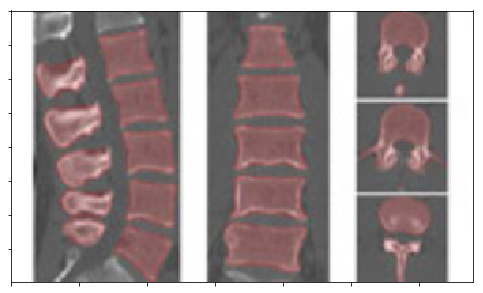

In [2]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline


DatabaseVertebraSegmentation = plt.imread('../assets/DatabaseVertebraSegmentation.jpg')
plt.figure(figsize=(10,5))
plt.imshow(DatabaseVertebraSegmentation)

frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])

## Load Images

In [5]:
## pip install pynrrd


import numpy as np
import nrrd

# Image Intensity: 0~1 
####################################################
subject = "Subject01/"
####################################################
path = "../Dataset/Lumbar Vertebrae Semgnetation/"

Original = "Original.nrrd"
L1 = "L1.nrrd"
L2 = "L2.nrrd"
L3 = "L3.nrrd"
L4 = "L4.nrrd"
L5 = "L5.nrrd"


Orig_img, Orig_header = nrrd.read(path + subject + Original)
print("Original")
print(Orig_img.shape)
print(Orig_header)

L1_img, L1_header = nrrd.read(path + subject + L1)
print("L1")
print(L1_img.shape)
print(L1_header)

L2_img, L2_header = nrrd.read(path + subject + L2)
print("L2")
print(L2_img.shape)
print(L2_header)

L3_img, L3_header = nrrd.read(path + subject + L3)
print("L3")
print(L3_img.shape)
print(L3_header)

L4_img, L4_header = nrrd.read(path + subject + L4)
print("L4")
print(L4_img.shape)
print(L4_header)

L5_img, L5_header = nrrd.read(path + subject + L5)
print("L5")
print(L5_img.shape)
print(L5_header)

print('\n *** Process Done *** ')

Original
(1024, 1024, 200)
OrderedDict([('type', 'short'), ('dimension', 3), ('sizes', array([1024, 1024,  200])), ('spacings', array([0.28245, 0.28245, 1.07   ])), ('axis mins', array([-1.41225000e-01, -2.89087565e+02, -5.35000000e-01])), ('centerings', ['cell', 'cell', 'cell']), ('endian', 'little'), ('encoding', 'gzip')])
L1
(1024, 1024, 200)
OrderedDict([('type', 'unsigned char'), ('dimension', 3), ('sizes', array([1024, 1024,  200])), ('spacings', array([0.28245, 0.28245, 1.07   ])), ('axis mins', array([-1.41225000e-01, -2.89087565e+02, -5.35000000e-01])), ('centerings', ['cell', 'cell', 'cell']), ('encoding', 'gzip')])
L2
(1024, 1024, 200)
OrderedDict([('type', 'unsigned char'), ('dimension', 3), ('sizes', array([1024, 1024,  200])), ('spacings', array([0.28245, 0.28245, 1.07   ])), ('axis mins', array([-1.41225000e-01, -2.89087565e+02, -5.35000000e-01])), ('centerings', ['cell', 'cell', 'cell']), ('encoding', 'gzip')])
L3
(1024, 1024, 200)
OrderedDict([('type', 'unsigned char')

[]

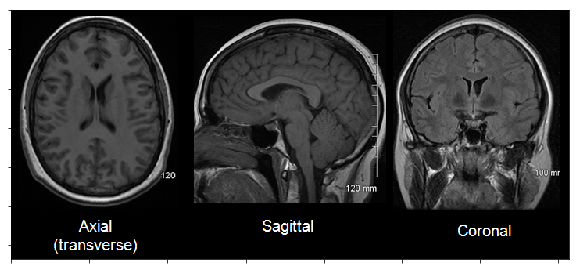

In [4]:
ct_view = plt.imread('./assets/ct_view.png')
plt.figure(figsize=(10,5))
plt.imshow(ct_view)

frame = plt.gca()
frame.axes.xaxis.set_ticklabels([])
frame.axes.yaxis.set_ticklabels([])

## Get Image & Mask

In [6]:
##############################
for index in range(400, 651): # 
##############################
    """ Image """
    ### Resizing (1024 to 512) 
    orig_img = Orig_img * 0.1
    orig_img = orig_img[index, :, :]
    orig_img = cv2.resize(orig_img,(512,512))

    ### Rotation 
    rows, cols = orig_img.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2),270, 1)  # 이미지의 중심점을 기준으로 90도 회전 하면서 1배 Scale
    orig_img = cv2.warpAffine(orig_img, M,(cols, rows))


    """ Mask """
    side_img = L1_img[index, :, :] + L2_img[index, :, :] + L3_img[index, :, :] + L4_img[index, :, :] + L5_img[index, :, :]

    ### Resizing (1024 to 512) 
    side_img = cv2.resize(side_img,(512,512))

    ### Rotation 
    rows, cols = side_img.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2),270, 1)  
    side_img = cv2.warpAffine(side_img, M,(cols, rows))

    ### Convert RGB to Gray 
    side_img = side_img * 255


    """ Save """
    cv2.imwrite(path + subject + 'image/' + str(index).zfill(5) + '.png',  orig_img)
    cv2.imwrite(path + subject + 'mask/' + str(index).zfill(5) + '.png',  side_img)
    cv2.waitKey(0)

NameError: name 'cv2' is not defined